# Исследование объявлений о продаже квартир

Данные для исследования предоставлены сервисом Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма).


**Цель исследования** — найти интересные особенности и зависимости, которые существуют на рынке недвижимости в Санкт-Петербурге и области. Это позволит построить автоматизированную систему, которая сможет отслеживать аномалии и мошенническую деятельность. 

**Задачи исследования:**
* Узнать, зависит ли цена квартиры от общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год).
* Посмотреть, где самая высокая цена за квадратный метр, а где самая низкая.
* Определиь, зависит ли удаленность от центра на цену квартиры.

**Ход исследования**

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Общие выводы.

## 1. Откроем файл с данными и изучим общую информацию

In [1]:
# импортируем необходимые библиотеки для анализа
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv('/Users/polinamokretsova/real_estate_data.csv', sep='\t')

In [3]:
# посмотрим первые 5 строк 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# посмотрии общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# получим список характерных значений для наших данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


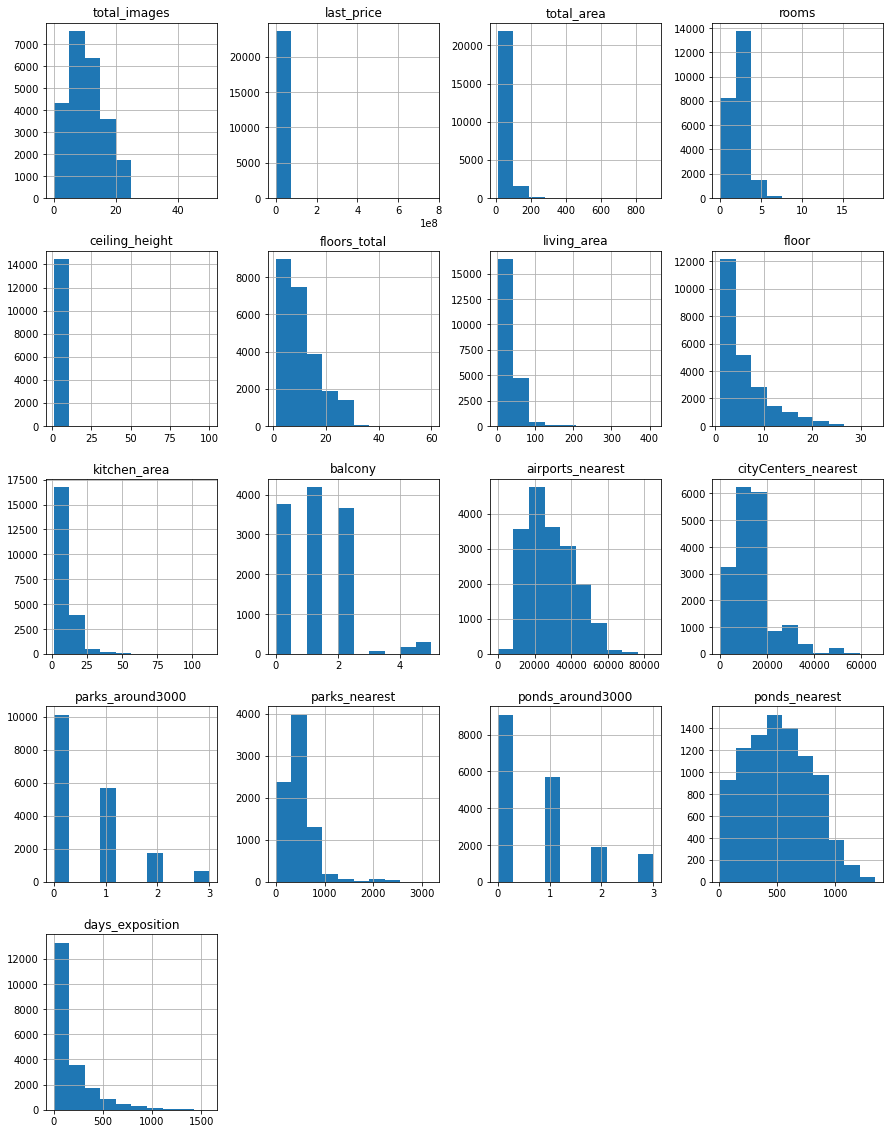

In [6]:
# построим гистограммы по нашим данным
data.hist(figsize=(15, 20))
plt.show()

**Мы получили данные и ознакомились с ними.** \
По гистограммам мы можем заметить, что некоторые данные содержат аномальные значения: цена объекта, общая площадь, количество комнат, этажей в доме и многие другие. 

Чтобы получить наиболее достоверные данные и провести анализ корректно, нам необходимо обработать данные: 
- проверить пропуски в данных, 
- поменять некоторые типы данных, 
- заполнить их подходящими значениями, 
- избавиться от аномальных и редких значений. 

Перейдём к предобработке.

## 2. Предобработка данных

### 2.1. Проверим данные на пропуски

In [7]:
pd.DataFrame(round(data.isna().sum())).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


Мы получили 14 стобцов с пропусками, которые дальше нам предстоит обработать.

#### 2.1.1. Изменим название столбца cityCenters_nearest

In [8]:
# приведем к змеиному регистру столбец 'cityCenters_nearest'
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#### 2.1.2. Обработка пропусков в столбцах balcony, parks_around3000, ponds_around3000, is_apartment

In [9]:
# заменяем на ноль значения в тех столбцах, где это подходит по смыслу – наличие балконов, парков и водоёмов в радиусе 3км
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# заменяем на False пропущенные значения в столбце is_apartment
data['is_apartment']=data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna(False)

**Причина появления пропусков:**
* Пропуски в столбцах с наличием балкона, парков и водоемов поблизости могли появиться из-за того, что их просто нет
* Пропуски в столбце с апартаментами могли появиться из-за того, что это квартира, а не апартаменты, поэтому ячейку не заполнили

#### 2.1.3. Обработка пропусков в столбце locality_name

Удаляем строки, где не указано название населённого пункта, так как их количество незначительное (49 - примерно 2%), и мы не сможем доставерно заполнить эти ячейки.

In [10]:
data = data.dropna(subset=['locality_name'])

**Причина появления пропусков:**
* Пропуски могли появиться из-за ошибки выгрузки данных

#### 2.1.4. Обработка пропусков в столбце kitchen_area

In [11]:
# заполняем медианным значением столбец с площадью кухни 'kitchen_area', используя дополнительный коэффициент
# оставшееся небольшое количество строк с пропусками, после обработки циклом, оставим без заполнения
data['coeff_kitchen_area'] = data['kitchen_area'] / data['total_area']
rooms_coeff_kitchen_area = data.query('kitchen_area > 0').pivot_table(index='rooms', values='coeff_kitchen_area')
print(rooms_coeff_kitchen_area)

for room in rooms_coeff_kitchen_area.index:
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'total_area'] * rooms_coeff_kitchen_area.loc[room, 'coeff_kitchen_area']

       coeff_kitchen_area
rooms                    
1                0.249899
2                0.174138
3                0.140924
4                0.124006
5                0.113455
6                0.104150
7                0.091932
8                0.091708
9                0.075054
10               0.088013
11               0.066855
12               0.124444
14               0.075636
15               0.169492
16               0.048148
19               0.073679


**Причина появления пропусков:**
* Пропуски могли появиться из-за ошибки выгрузки данных

#### 2.1.5. Обработка пропусков в столбце living_area

In [12]:
# заполняем медианным значением столбец с площадью 'living_area', используя дополнительный коэффициент

data['coeff_living_area'] = data['living_area'] / data['total_area']
rooms_coeff_living_area = data.query('living_area > 0').pivot_table(index='rooms', values='coeff_living_area')
print(rooms_coeff_living_area)

for room in rooms_coeff_living_area.index:
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] =\
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'total_area'] * rooms_coeff_living_area.loc[room, 'coeff_living_area']

       coeff_living_area
rooms                   
0               0.685467
1               0.485962
2               0.579358
3               0.625280
4               0.646667
5               0.641377
6               0.668819
7               0.657981
8               0.667001
9               0.612299
10              0.645065
11              0.710093
12              0.455222
14              0.648695
15              0.693220
16              0.666667
19              0.706086


**Причина появления пропусков:**
* Пропуски могли появиться из-за ошибки выгрузки данных

#### 2.1.6. Обработка пропусков в столбце ceiling_height

In [13]:
# заполняем медианным значением столбец ceiling_height в зависимости от местоположения, где это возможно
# оставшиеся значения заменяем на общее медианное значение (2.77)

warnings.filterwarnings('ignore')

for place in data['locality_name'].unique():
    data.loc[data['locality_name'] == place,'ceiling_height'] = \
    data.loc[data['locality_name'] == place, 'ceiling_height'].fillna(data.loc[data['locality_name'] == place,'ceiling_height'].median())

    data['ceiling_height'] = data['ceiling_height'].fillna(2.77)

#### 2.1.7. Обработка пропусков в столбце floors_total

In [14]:
# пропуски в столбце с количеством этажей в доме можно заменить общим медианным значением (10), это не повлияет на ход анализа
data['floors_total'] = data['floors_total'].fillna(10)

#### 2.1.8. Обработка пропусков в столбце parks_nearest, ponds_nearest, airports_nearest, city_centers_nearest

Заполним медианным значением строки в столбцах, где это возможно. Где нет - меняем значения на отрицательный маркер (это нам будет удобно для дальнейших этапов исследования)

In [15]:
# заполняем медианным значением строки в столбце расстояния до парка
for place in data['locality_name'].unique():
        data.loc[data['locality_name'] == place, 'parks_nearest'] = \
        data.loc[data['locality_name'] == place, 'parks_nearest'].fillna(data.loc[data['locality_name'] == place, 'parks_nearest'].median())
data['parks_nearest'] = data['parks_nearest'].fillna(-500)

# повторяем те же дейсвтия для водоемов
for place in data['locality_name'].unique():
        data.loc[data['locality_name'] == place, 'ponds_nearest'] = \
        data.loc[data['locality_name'] == place, 'ponds_nearest'].fillna(data.loc[data['locality_name'] == place, 'ponds_nearest'].median())
data['ponds_nearest'] = data['ponds_nearest'].fillna(-500)

# повторяем те же дейсвтия для аэропортов
for place in data['locality_name'].unique():
        data.loc[data['locality_name'] == place, 'airports_nearest'] = \
        data.loc[data['locality_name'] == place, 'airports_nearest'].fillna(data.loc[data['locality_name'] == place, 'airports_nearest'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(-500)

# повторяем те же дейсвтия для центра города
for place in data['locality_name'].unique():
        data.loc[data['locality_name'] == place, 'city_centers_nearest'] = \
        data.loc[data['locality_name'] == place, 'city_centers_nearest'].fillna(data.loc[data['locality_name'] == place, 'city_centers_nearest'].median())
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(-500)

**Причина появления пропусков:**
* Пропуски в этих столбцах могли появиться из-за того, что населенный пункт далеко или человек просто не знает расстояние

#### 2.1.9. Обработка пропусков в столбце days_exposition
**Причина появления пропусков в этом столбце:** на помент выгрузки данных объявление было еще актуальным. Оставим пропуски в этом столбце без изменения.

In [16]:
# Посмотрим на результат предобработки данных – пропуски должны быть заполнены
pd.DataFrame(round(data.isna().sum())).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,0
living_area,0
floor,0
is_apartment,0


### 2.2. Изменения типов данных

In [17]:
# изменим типы данных в столбцах, где это необходимо
data['floors_total']=data['floors_total'].astype('int')
data['balcony']=data['balcony'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['parks_around3000']=data['parks_around3000'].astype('int')
data['ponds_around3000']=data['ponds_around3000'].astype('int')

**Причины изменения типов данных в столбцах:**
* Количество этажей в доме и балконов – целое число
* Апартаменты – по условию булев тип (апартаменты: да или нет)
* Дата размещения обявления – не строка, а дата
* Количество парков и водоёмов в радиусе 3 км – целое число

### 2.3. Проверим данные на дубликаты

#### 2.3.1. Проверим данные на явные дубликаты

In [18]:
data.duplicated().sum()

0

#### 2.3.2. Изучим уникальные значения в столбце с названиями населённых пунктов и устраним неявные дубликаты

In [19]:
# проверим данные на неявные дубликаты
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Неявные дубликаты могут скрываться за буквами е и ё, а также за типом населённого пункта. Приведём строки к нижнему регистру, заменим е на ё и уберём из названия типы населенных пунктов, чтобы легче было проверить дубликаты.

In [20]:
data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex = True)
data['locality_name'] = data['locality_name'].str.replace('деревня ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('поселок ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('село ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('поселок станции ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ', '', regex = True)

sorted(data['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Ваганово',
 'Вартемяги',
 'Вахнова Кара',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружноселье',
 'Елизаветино',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Калитино',
 'Каложицы',
 'Кальтино',
 'Каменногорск',
 'Камышовка',
 'Каськово',
 'Келози',
 'Кикерино',
 'Кингисепп',
 'Кингисеппский',
 'Кипень',

#### 2.4. Проверим данные на аномалии, найдём и устраним редкие и выбивающиеся значения

In [21]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff_kitchen_area,coeff_living_area
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23453.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,20470.000000,21381.000000,21752.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.754163,10.673446,34.655303,5.893277,10.535776,0.591712,22184.183340,10881.840423,0.469091,228.446406,0.590359,274.927061,180.753200,0.187372,0.564750
std,5.682278,1.089640e+07,35.661808,1.078620,0.987952,6.583085,22.772473,4.883317,5.815763,0.959662,16610.767105,9779.853489,0.748458,470.913571,0.883539,461.019827,219.777916,0.072972,0.105385
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,-500.000000,-500.000000,0.000000,-500.000000,0.000000,-500.000000,1.000000,0.025381,0.021583
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.100000,0.000000,10638.000000,2488.000000,0.000000,-500.000000,0.000000,86.000000,45.000000,0.133333,0.495157
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.200000,0.000000,22057.500000,11356.500000,0.000000,460.000000,0.000000,503.000000,95.000000,0.172414,0.567860
75%,14.000000,6.799000e+06,69.700000,3.000000,2.770000,16.000000,42.300000,8.000000,11.950000,1.000000,34509.000000,15318.750000,1.000000,460.000000,1.000000,503.000000,231.000000,0.232432,0.637778
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,415.185969,33.000000,123.475061,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,0.787879,1.000000


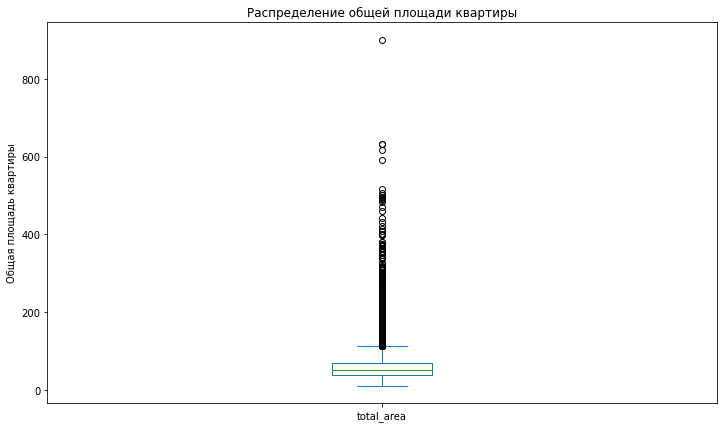

In [22]:
# построим диаграмму размаха для столбца с общей площадью 
data['total_area'].plot(kind = 'box', figsize = (12,7))
plt.title('Распределение общей площади квартиры')
plt.ylabel('Общая площадь квартиры')
plt.show()

По диаграмме видим, что за пределы номрального отклонения выходят квартиры с общей площадью больше 120, устраним их.

In [23]:
data = data[data['total_area'] <= 105]
data = data[data['total_area'] > 15]

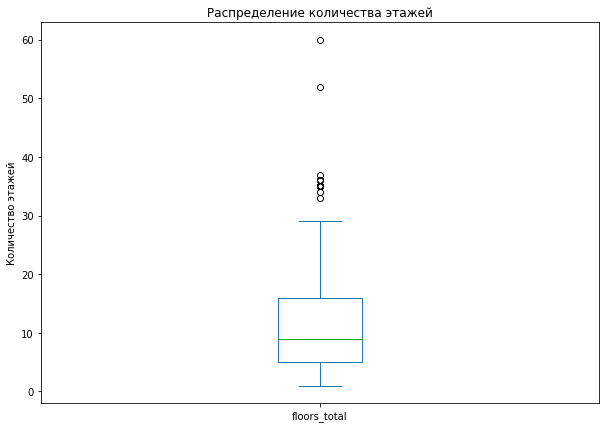

In [24]:
# максимальное значение в столбце 'floors_total' - 60 вызывает вопросы, построим диаграмму размаха
data['floors_total'].plot(kind = 'box', figsize = (10,7))
plt.title('Распределение количества этажей')
plt.ylabel('Количество этажей')
plt.show()

Опираясь на данные по ЖК в Петербурге, самое высокое жилое здание – 35 этажей. Ззначит, здания, которые выше 35 – аномальные значения. 

In [25]:
# Посмотрим на здания, выше 35 этажей
data.query('floors_total > 35')[['floor', 'floors_total', 'locality_name']]

,floor,floors_total,locality_name
397,28,36,Санкт-Петербург
2253,4,60,Кронштадт
5807,13,36,Санкт-Петербург
11079,29,36,Санкт-Петербург
16731,18,52,Санкт-Петербург
16934,5,37,Санкт-Петербург


60-этажное здание в Кронштадте вызывает вопросы, скорее всего это 6 этаж, а не 60. Удалим аномальные значения – здания, которые выше 30 этажей.

In [26]:
data.loc[data['floors_total'] == 60, 'floors_total'] = data.loc[data['floors_total'] == 60, 'floors_total']/10
data = data[data['floors_total'] < 30]

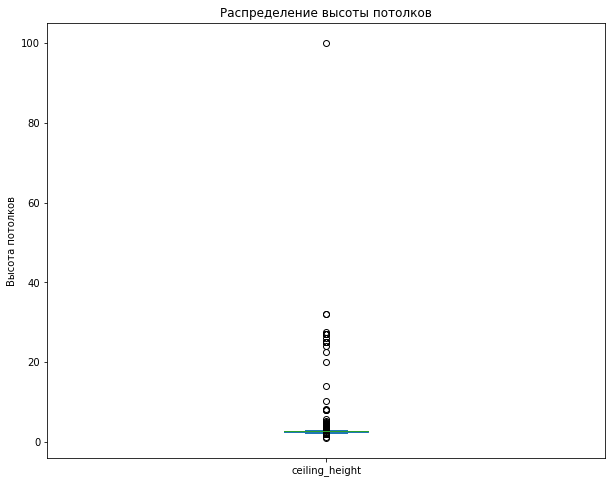

In [27]:
# аномальным кажется значение в столбце 'ceiling_height' - 100. Построим диаграмму размаха
data['ceiling_height'].plot(kind = 'box', figsize = (10,8))
plt.title('Распределение высоты потолков')
plt.ylabel('Высота потолков')
plt.show()

Опираясь на данные о высоте потолков, стандартной высотой считаются потолки от 2,4м до 4м – это элитное жилье, остальные данные будем считать аномальными.

In [28]:
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = data.loc[data['ceiling_height'] > 15, 'ceiling_height']/10
data = data[data['ceiling_height'] >= 2.4]
data = data[data['ceiling_height'] <= 3]

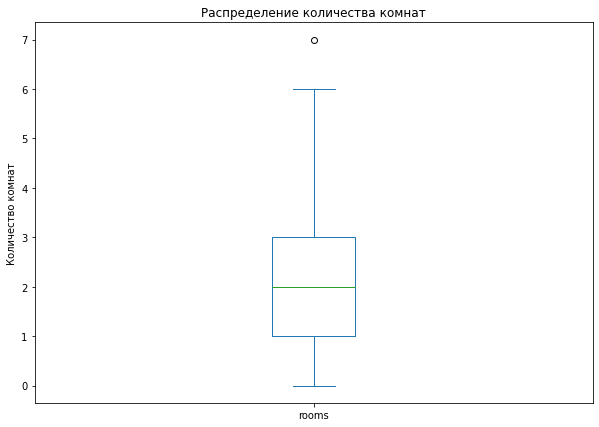

In [29]:
# построим диаграмму размаха для столбца 'rooms'
data['rooms'].plot(kind ='box',figsize=(10,7))
plt.title('Распределение количества комнат')
plt.ylabel('Количество комнат')
plt.show()

По диаграмме видим, что за пределы номрального отклонения выходят квартиры с комнатами больше 6.

In [30]:
# оставим в данных количество комнат, которое превышает 6
data = data[data['rooms'] <= 6]

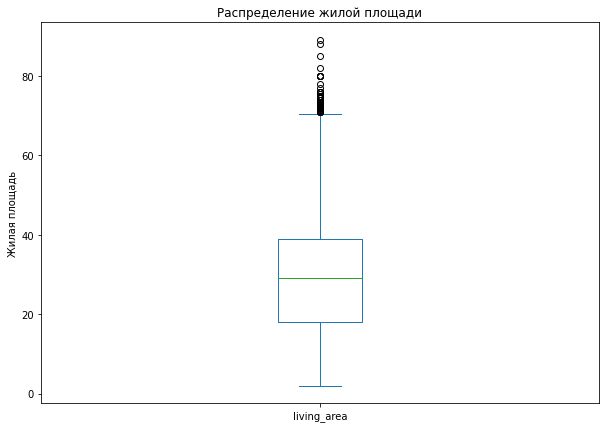

In [31]:
# построим диаграмму размаха для столбца 'living_area'
data['living_area'].plot(kind ='box', figsize=(10,7))
plt.title('Распределение жилой площади')
plt.ylabel('Жилая площадь')
plt.show()

По диаграмме видим, что за пределы номрального отклонения выходят квартиры с жилой площадью больше 70, устраним их.

In [32]:
data = data[data['living_area'] <= 70]

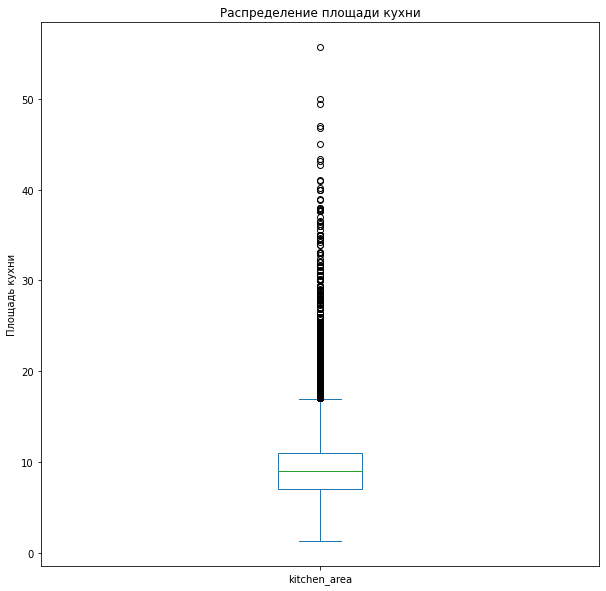

In [33]:
# построим диаграмму размаха для столбца 'kitchen_area'
data['kitchen_area'].plot(kind ='box', figsize=(10,10))
plt.title('Распределение площади кухни')
plt.ylabel('Площадь кухни')
plt.show()

По диаграмме видим, что за пределы номрального отклонения выходят квартиры c площадью кухни больше 20, устраним их.

In [34]:
data = data[data['kitchen_area'] <= 20]

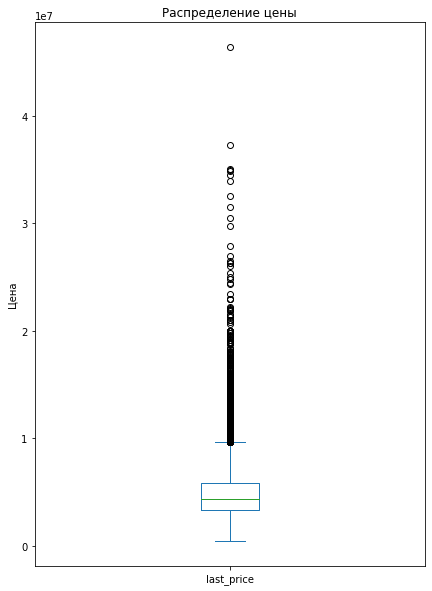

In [35]:
#  построим диаграмму размаха для столбца 'last_price'
data['last_price'].plot(kind = 'box', figsize = (7,10))
plt.title('Распределение цены')
plt.ylabel('Цена')
plt.show()

По диаграмме видим, что за пределы номрального отклонения выходят квартиры с ценой больше 10 млн, устраним их.

In [36]:
data = data[data['last_price'] <= 10000000]

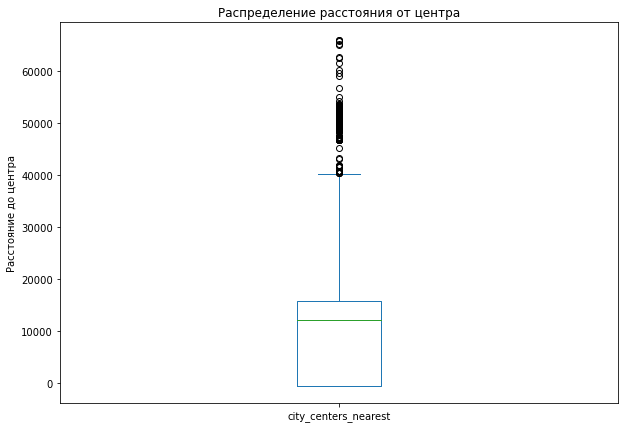

In [37]:
#  построим диаграмму размаха для столбца 'city_centers_nearest'
data['city_centers_nearest'].plot(kind = 'box', figsize = (10,7))
plt.title('Распределение расстояния от центра')
plt.ylabel('Расстояние до центра')
plt.show()

Верхняя граница значений - 30000. Оставим все, что меньше или равно этому значению.

In [38]:
data = data[data['city_centers_nearest'] <= 30000]

#### 2.5. Добавим в таблицу новые столбцы

In [39]:
# цена одного квадратного метра
data['one_metr_price'] = data['last_price'] / data['total_area']

In [40]:
# день недели публикации объявления
data['day_number'] = data['first_day_exposition'].dt.weekday

In [41]:
# месяц публикации объявления
data['first_day_exposition'].dt.date #приводим к временному формату
data['month_number'] = data['first_day_exposition'].astype('datetime64[M]') 

In [42]:
# год публикации объявления
data['year_number'] = data['first_day_exposition'].dt.year

In [43]:
# тип этажа квартиры: "первый", "последний", "другой"
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)    

In [44]:
# расстояние до центра города в километрах (переведём из м в км и округлим до целых значений)
data['city_centers_km'] = (data['city_centers_nearest']/1000).round()

In [45]:
# проверим, что столбцы добавлены
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 1 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18249 non-null  int64         
 1   last_price            18249 non-null  float64       
 2   total_area            18249 non-null  float64       
 3   first_day_exposition  18249 non-null  datetime64[ns]
 4   rooms                 18249 non-null  int64         
 5   ceiling_height        18249 non-null  float64       
 6   floors_total          18249 non-null  int64         
 7   living_area           18249 non-null  float64       
 8   floor                 18249 non-null  int64         
 9   is_apartment          18249 non-null  bool          
 10  studio                18249 non-null  bool          
 11  open_plan             18249 non-null  bool          
 12  kitchen_area          18249 non-null  float64       
 13  balcony         

**В ходе предобработки данных:** 
* Мы обработали пропуски в данных (где-то заменили медианным значением, заменили на 0 или маркером).
* Также мы обнаружили выбивающиеся аномальные значения, которые затем устранили.
* Изменили типы данных, где это было необходимо.
* Создали новые столбцы, которые пригодятся нам для дальнейшего анализа.

## 3.  Исследовательский анализ данных

### 3.1. Построим гистограммы для параметров, необходимых для анализа

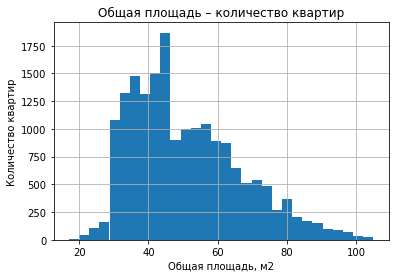

In [46]:
# total_area
data['total_area'].hist(bins=30)
plt.title('Общая площадь – количество квартир')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир на продаже площадью около 45м².

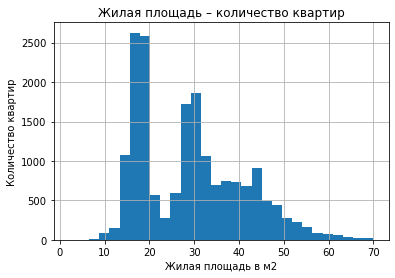

In [47]:
# living_area
data['living_area'].hist(bins=30)
plt.title('Жилая площадь – количество квартир')
plt.xlabel('Жилая площадь в м2')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир с жилой площадью 15-20м².

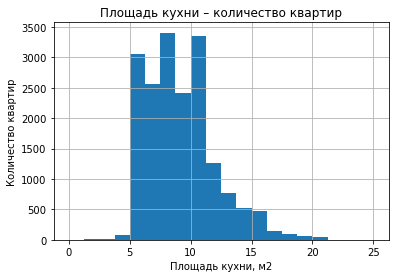

In [48]:
# kitchen_area
data['kitchen_area'].hist(bins=20, range=(0,25))
plt.title('Площадь кухни – количество квартир')
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Количество квартир')
plt.show()

Площадь кухни в основном от 5 до 11м².

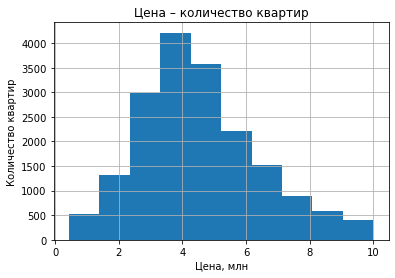

In [49]:
# last_price
data['last_price'] = data['last_price']/1000000 # переведем в миллион
data['last_price'].hist(bins=10)
plt.title('Цена – количество квартир')
plt.xlabel('Цена, млн')
plt.ylabel('Количество квартир')
plt.show()

Здесь мы видим, что больше в нашей выборке квартир стоимостью 3-4 млн. Меньше всего 9-10 млн.

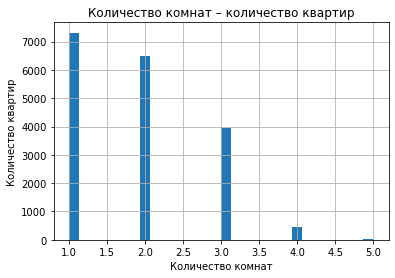

In [50]:
data['rooms'].hist(bins=30)
plt.title('Количество комнат – количество квартир')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Здесь мы можем сделать вывод, что большинство квартир на продаже 1-3-комнатные, меньше 4-комнатных.

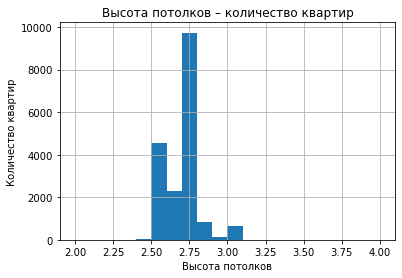

In [51]:
data['ceiling_height'].hist(bins=20, range=(2,4))
plt.title('Высота потолков – количество квартир')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

Преобладающая высота потолков - 2.77м.

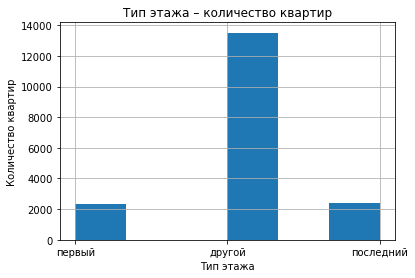

In [52]:
data['floor_type'].hist(bins=6)
plt.title('Тип этажа – количество квартир')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Здесь мы видим, что большинство квартир находятся не на первых и последних этажах.

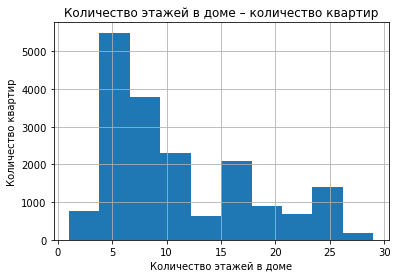

In [53]:
data['floors_total'].hist(bins=10)
plt.title('Количество этажей в доме – количество квартир')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

Преобладают 4, 5 и 6-этажные дома в наших данных.

В следующих четырёх гистограммах поставим условие >= 0, т.к. во время предобработки данных, мы заменяли оставшиеся строки на отрицательный маркер.

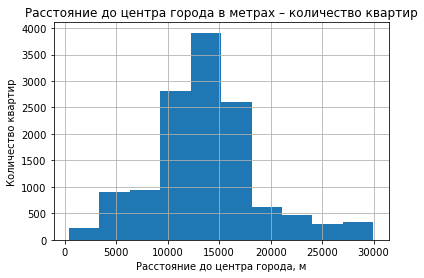

In [54]:
city_centers_metres = data.loc[data['city_centers_nearest'] >= 0, 'city_centers_nearest']
city_centers_metres.hist()
plt.title('Расстояние до центра города в метрах – количество квартир')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир в средней отдаленности от центра.

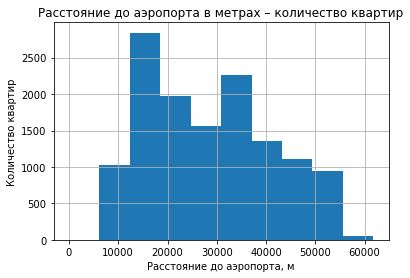

In [55]:
airport_metres = data.loc[data['airports_nearest'] >= 0, 'airports_nearest']
airport_metres.hist()
plt.title('Расстояние до аэропорта в метрах – количество квартир')
plt.xlabel('Расстояние до аэропорта, м')
plt.ylabel('Количество квартир')
plt.show()

Квартиры в среднем располагаются в 10-35км от аэропорта.

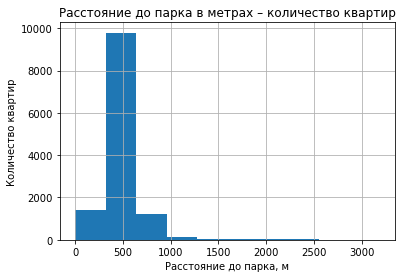

In [56]:
park_metres = data.loc[data['parks_nearest'] >= 0, 'parks_nearest']
park_metres.hist()
plt.title('Расстояние до парка в метрах – количество квартир')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир имеют парк в 500м от дома.

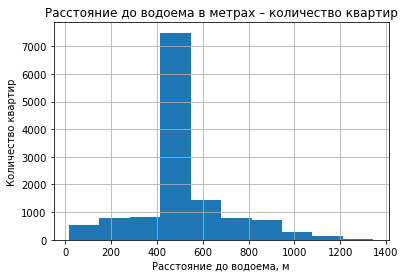

In [57]:
ponds_metres = data.loc[data['ponds_nearest'] >= 0, 'ponds_nearest']
ponds_metres.hist()
plt.title('Расстояние до водоема в метрах – количество квартир')
plt.xlabel('Расстояние до водоема, м')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир имеют водоем в 500м от дома.

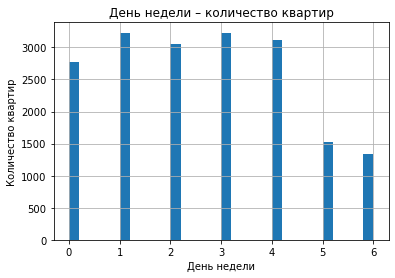

In [58]:
data['day_number'].hist(bins=30, range=(0,6))
plt.title('День недели – количество квартир')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

По гистограмме мы видим, что в будние дни квартиры продавались лучше, чем на выходных. Чуть лучше – вторник и четверг.

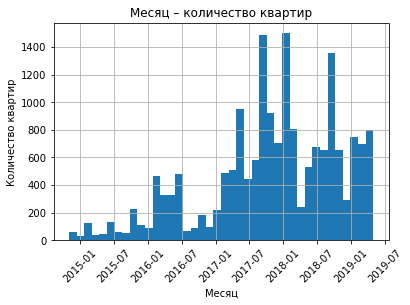

In [59]:
data['month_number'].hist(bins=40)
plt.title('Месяц – количество квартир')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.xticks(rotation=45)
plt.show()

По гистограмме видим, что лучше всего квартиры продавались в январе 2018 года.

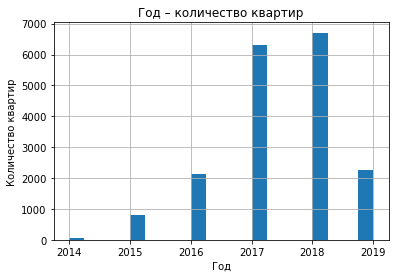

In [60]:
data['year_number'].hist(bins=20)
plt.title('Год – количество квартир')
plt.xlabel('Год')
plt.ylabel('Количество квартир')
plt.show()

По гистограмме видим, что больше всего квартир было продано в 2018 году. Изучив данные по продажам на рынке недвижимости в этом году в Санкт-Петербурге рост спроса составил +5% по сравнению с прошлым годом. 

**Посмотрим, как быстро продавались квартиры**

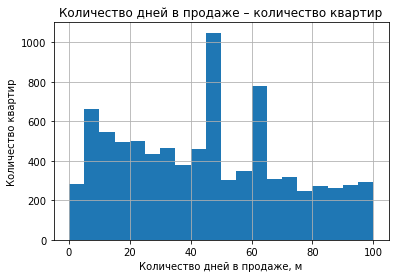

In [61]:
data['days_exposition'].hist(bins=20, range=(0,100))
plt.title('Количество дней в продаже – количество квартир')
plt.xlabel('Количество дней в продаже, м')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартиры находятся 45 и 60 дней в продаже.

In [62]:
data['days_exposition'].describe()

count    16114.000000
mean       167.464689
std        205.040736
min          1.000000
25%         43.000000
50%         89.000000
75%        211.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [63]:
print('Среднее количество дней, когда было размещено объявление:', round(data['days_exposition'].mean()))
print('Медиана количества дней, когда было размещено объявление:', round(data['days_exposition'].median()))

Среднее количество дней, когда было размещено объявление: 167
Медиана количества дней, когда было размещено объявление: 89


**Вывод:** \
Чаще всего продажа занимает 45 и 60 дней. \
Быстрыми можно считать те квартиры, которые продавались до 5 дней. \
Необычно долгими можно считать квартиры, которые продавались от 167 дней. \
\
При определении количества дней в продаже, которое характерно для нашей выборки, мы опирались на медианное значение, так как именно это число указывает на наиболее подходящее и усредненное значение.

### 3.2. Посмотрим, какие факторы больше всего влияют на стоимость объекта

Построим графики и матрицу корреляции

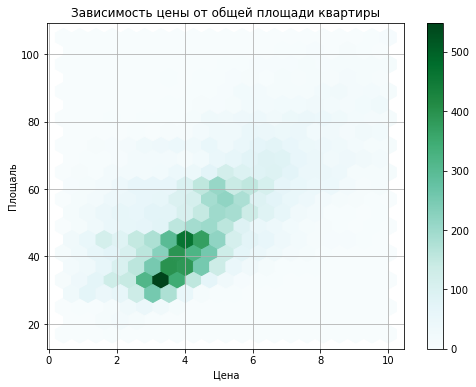

In [64]:
# зависит ли цена от общей площади квартиры
data.plot(x='last_price',y='total_area', kind='hexbin', gridsize=20, figsize=(8,6),sharex=False, grid=True)
plt.title('Зависимость цены от общей площади квартиры')
plt.xlabel('Цена')
plt.ylabel('Площаль')
plt.show()

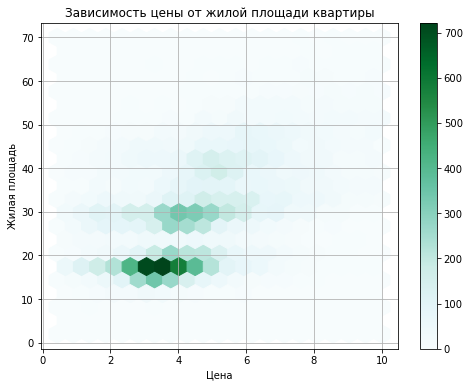

In [65]:
# зависит ли цена от жилой площади квартиры
data.plot(x='last_price',y='living_area', kind='hexbin', gridsize=20, figsize=(8,6),sharex=False, grid=True)
plt.title('Зависимость цены от жилой площади квартиры')
plt.xlabel('Цена')
plt.ylabel('Жилая площадь')
plt.show()

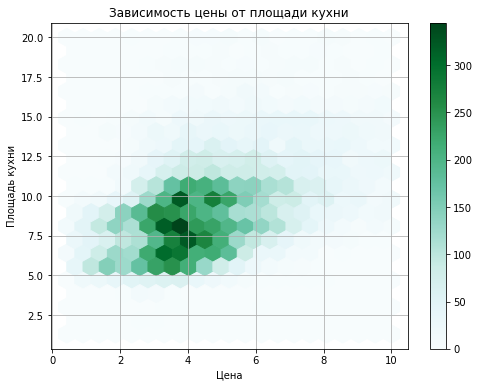

In [66]:
# зависит ли цена от площади кухни
data.plot(x='last_price',y='kitchen_area', kind='hexbin', gridsize=20, figsize=(8,6),sharex=False, grid=True)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Цена')
plt.ylabel('Площадь кухни')
plt.show()

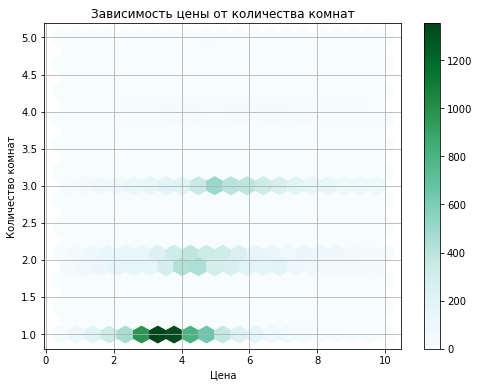

In [67]:
# зависит ли цена от количества комнат
data.plot(x='last_price',y='rooms', kind='hexbin', gridsize=20, figsize=(8,6),sharex=False, grid=True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Цена')
plt.ylabel('Количество комнат')
plt.show()

In [68]:
# заменим типы этажа квартиры "первый", "последний", "другой" на 1,3,2
def floor_type_number(row):
    if row['floor'] == 1:
        return 1
    elif row['floor'] == row['floors_total']:
        return 3
    else:
        return 2
data['floor_type_number'] = data.apply(floor_type_number, axis=1)    

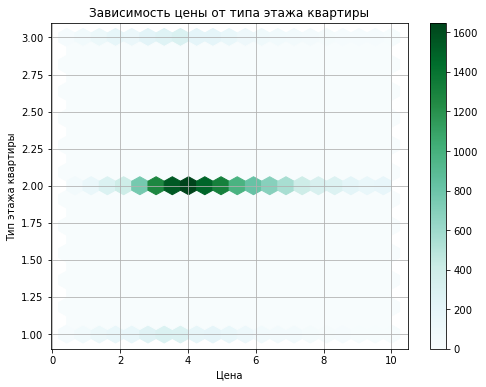

In [69]:
# зависит ли цена от типа этажа квартиры 
data.plot(x='last_price',y='floor_type_number', kind='hexbin', gridsize=20, figsize=(8,6),sharex=False, grid=True)
plt.title('Зависимость цены от типа этажа квартиры')
plt.xlabel('Цена')
plt.ylabel('Тип этажа квартиры')
plt.show()

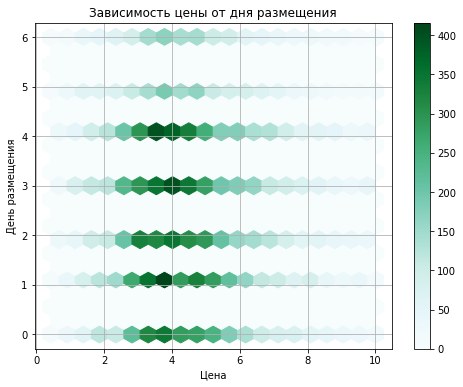

In [70]:
# зависит ли цена от дня размещения 
data.plot(x='last_price',y='day_number', kind='hexbin', gridsize=20, figsize=(8,6),sharex=False, grid=True)
plt.title('Зависимость цены от дня размещения')
plt.xlabel('Цена')
plt.ylabel('День размещения')
plt.show()

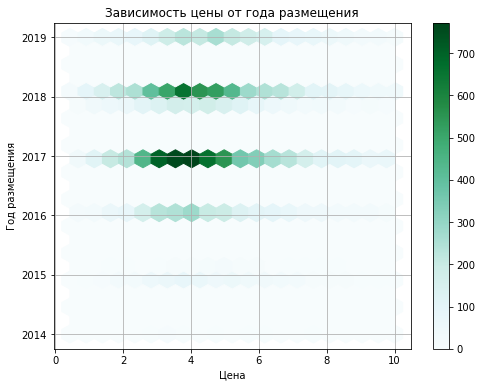

In [71]:
# зависит ли цена от года размещения 
data.plot(x='last_price',y='year_number', kind='hexbin', gridsize=20, figsize=(8,6),sharex=False, grid=True)
plt.title('Зависимость цены от года размещения')
plt.xlabel('Цена')
plt.ylabel('Год размещения')
plt.show()

In [72]:
price_factors = data.loc[:, ['last_price', 'total_area', 'living_area', 'kitchen_area','rooms', 'floor_type_number', 'day_number', 'year_number']]
price_factors.corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor_type_number,day_number,year_number
last_price,1.000000,0.634401,0.509616,0.442557,0.388349,0.013209,-0.009697,0.018281
total_area,0.634401,1.000000,0.914178,0.378568,0.807206,-0.013393,-0.003315,-0.051515
living_area,0.509616,0.914178,1.000000,0.089039,0.905312,-0.016081,-0.000890,-0.038524
kitchen_area,0.442557,0.378568,0.089039,1.000000,-0.048398,0.005435,-0.002857,-0.039408
rooms,0.388349,0.807206,0.905312,-0.048398,1.000000,-0.026971,0.001576,-0.023967
floor_type_number,0.013209,-0.013393,-0.016081,0.005435,-0.026971,1.000000,0.003168,0.009844
day_number,-0.009697,-0.003315,-0.000890,-0.002857,0.001576,0.003168,1.000000,-0.000551
year_number,0.018281,-0.051515,-0.038524,-0.039408,-0.023967,0.009844,-0.000551,1.000000


**По графикам и матрице корреляции мы видим, что больше всего зависимость цены на квартиру прослеживается от следующих факторов:**
* общая площадь, 
* жилая площадь,
* площадь кухни,
* количество комнат.

### 3.3. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [73]:
popular_locality = data.groupby('locality_name')['locality_name'].count()\
                       .to_frame()\
                       .rename(columns={'locality_name':'count'})\
                       .sort_values(by='count', ascending=False)\
                       .reset_index()\
                       .head(10)
popular_locality

,locality_name,count
0,Санкт-Петербург,12011
1,Мурино,555
2,Кудрово,427
3,Всеволожск,374
4,Шушары,331
5,Парголово,319
6,Гатчина,295
7,Выборг,210
8,Пушкин,189
9,Новое Девяткино,139


In [74]:
popular_locality = popular_locality['locality_name'].unique()

In [75]:
one_metr_price = data.query('locality_name in @popular_locality')\
                     .pivot_table(index='locality_name', values='one_metr_price')\
                     .sort_values(by='one_metr_price', ascending=False)
one_metr_price

,one_metr_price
locality_name,
Санкт-Петербург,104030.214323
Пушкин,99997.726760
Кудрово,95207.202329
Парголово,90500.169034
Мурино,85537.158963
Шушары,79035.117409
Новое Девяткино,76150.419953
Гатчина,68565.677949
Всеволожск,66570.391892


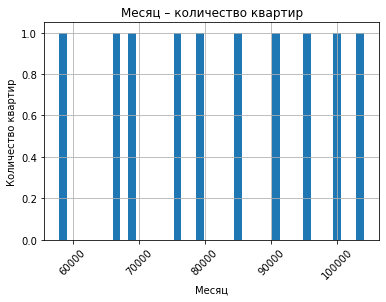

In [76]:
one_metr_price['one_metr_price'].hist(bins=40)
plt.title('Месяц – количество квартир')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.xticks(rotation=45)
plt.show()

**Вывод:**
* Самая высокая цена за квадратный метр – в Санкт-Петербурге.
* Самая низкая – в Выборге.

**Определим, как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге. Вычислим среднюю цену каждого километра**

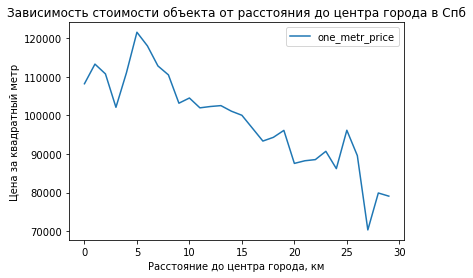

In [77]:
(data
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='city_centers_km', values='one_metr_price', aggfunc='median')
 .plot(title='Зависимость стоимости объекта от расстояния до центра города в Спб', xlabel='Расстояние до центра города, км', ylabel='Цена за квадратный метр')
)
plt.show()

**Вывод:**
* В основном мы наблюдаем такую тенденцию: чем ближе объект к центру города, тем выше цена.
* Так же наблюдаем пики на удаленности 19 и 25 км. Возможно, это хороший район или частный дом. 

### Общий вывод

Нашей целью было найти интересные особенности и зависимости, которые существуют на рынке недвижимости в Санкт-Петербурге и области.

В ходе исследования мы сделали обзор данных, провели предобработку (нашли пропуски и заполнили их там, где это возможно, обнаружили аномальные значения с помощью диаграмм размаха и устранили их для того, чтобы получить наиболее точные данные). После того, как данные стали пригодны для анализа, мы провели исследовательский анализ данных – построили графики и рассчитали матрицу корреляций.

**Что нам удалось выяснить об объектах, находившихся в продаже:**
* Больше всего квартир на продаже площадью около 45м².
* Больше всего квартир с жилой площадью 15-20м². Площадь кухни в основном от 5 до 11м².
* Больше в нашей выборке квартир стоимостью 3-4 млн. Меньше всего 9-10 млн.
* Большинство квартир на продаже 1-3-комнатные, меньше 4-комнатных.
* Преобладающая высота потолков - 2.77м.
* Большинство квартир находятся не на первых и последних этажах.
* Преобладают 4, 5 и 6-этажные дома.
* Больше всего квартир в средней отдаленности от центра.
* Квартиры в среднем располагаются в 10-35км от аэропорта.
* Больше всего квартир имеют парк и водоём в 500м от дома.

**Интересные факты о продаже объектов:**
* Чаще всего продажа занимает 45 и 60 дней. Быстрыми можно считать те квартиры, которые продавались до 5 дней. Необычно долгими можно считать квартиры, которые продавались от 167 дней.
* В будние дни квартиры продавались лучше, чем на выходных. Чуть лучше – вторник и четверг.
* Больше всего квартир было продано в 2018 году (особенно в январе). Изучив данные по продажам на рынке недвижимости в этом году в Санкт-Петербурге рост спроса составил +5% по сравнению с прошлым годом. 
* Больше всего **зависимость цены на квартиру** прослеживается от следующих факторов: общая площадь, жилая площадь, площадь кухни, количество комнат.
* Самая высокая цена за квадратный метр – в Санкт-Петербурге, самая низкая – в Выборге.
* В основном мы наблюдаем такую тенденцию: чем ближе объект к центру города, тем выше цена. При этом есть и такие объекты, которые находятся на далёком расстоянии, но их цена может сравниться с теми объектами, которые находятся ближе к центру города.